In [ ]:
# In colab run this cell first to setup the file structure!
%cd /content
!rm -rf MOL518-Intro-to-Data-Analysis

!git clone https://github.com/shaevitz/MOL518-Intro-to-Data-Analysis.git
%cd MOL518-Intro-to-Data-Analysis/Lecture_6

# Lecture 6: Functions and `.py` files for reusable code

So far we have been writing code directly in notebook cells. That is exactly what you should do when you are learning or exploring a new dataset.

But once you notice you are writing the *same code over and over*, that repetition becomes a problem:

- It is slow
- It is easy to make inconsistent changes
- Bugs hide in small differences

Today we learn how to *package* a block of code into a **function** and move those functions into a `.py` file so we can reuse them across notebooks and experiments.

The goals of this lecture are to:

- Write a function with inputs, a return value, and a docstring
- Understand parameters versus hard coded constants
- Distinguish printing from returning
- Understand variable scope at a practical level
- Create a small `.py` file and import from it in a notebook

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

## The problem with copy and paste

A very common workflow in this course has been:

1. Load a file
2. Extract the arrays we care about
3. Make a plot

If we do this once, it is fine.

But if we do this repeatedly (multiple drugs, multiple replicates, multiple experiments), we often start by copying and pasting code and editing it.

The danger is that the edits are not consistent. Sometimes the code still runs, but the result is wrong or mislabeled.

In [2]:
# We'll reuse the growth curve data from Lecture 3.
# This is a relative path from the Lecture_6 folder.
data_path = Path('../Lecture_3/data/ecoli_drugs.csv')

data = np.loadtxt(data_path, delimiter=',', skiprows=1)
time_min = data[:, 0]

Chloramphenicol = data[:, 4]
Gentamycin = data[:, 6]

Let's plot two of the growth curves

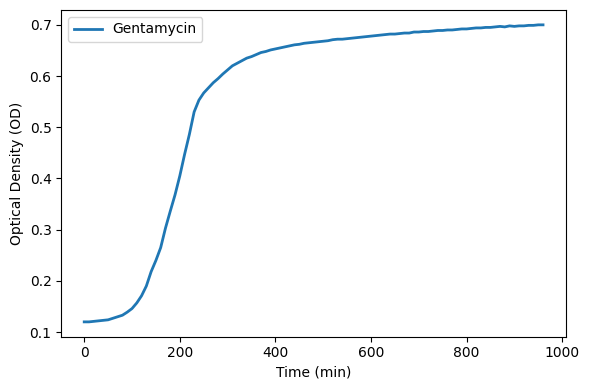

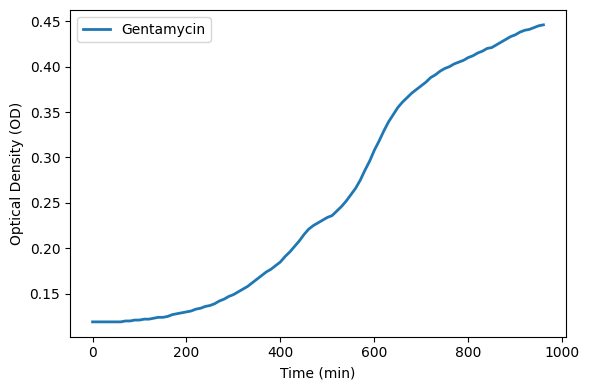

In [3]:
# First plot (looks fine)
plt.figure(figsize=(6, 4))
plt.plot(time_min, Gentamycin, lw=2, label='Gentamycin')
plt.xlabel('Time (min)')
plt.ylabel('Optical Density (OD)')
plt.legend()
plt.tight_layout()
plt.show()

# Second plot (copied and edited) -- can you spot the issue?
plt.figure(figsize=(6, 4))
plt.plot(time_min, Chloramphenicol, lw=2, label='Gentamycin')
plt.xlabel('Time (min)')
plt.ylabel('Optical Density (OD)')
plt.legend()
plt.tight_layout()
plt.show()

We didn't get an error message, but the second plot's label is wrong! Can you see why?

Let's fix this by putting the repeated plotting code into a function.

## The anatomy of a function

A function is a named block of code that takes **inputs** (arguments) and can `return` an **output**.

A good habit is to include a **docstring** (a string at the top of the function) that explains what the function does, what arguments it takes, and what it returns.

In [4]:
def plot_growth_curve(time_min, od, label):
    """
    Plot a single growth curve (OD vs time).

    Parameters
    ----------
    time_min : array
        Time values in minutes.
    od : array
        Optical density (OD) values.
    label : str
        Label to use in the legend.

    Returns
    -------
    None
        This function makes a plot and displays it.
    """

    plt.figure(figsize=(6, 4))
    plt.plot(time_min, od, lw=2, label=label)
    plt.xlabel('Time (min)')
    plt.ylabel('Optical Density (OD)')
    plt.legend()
    plt.tight_layout()
    plt.show()

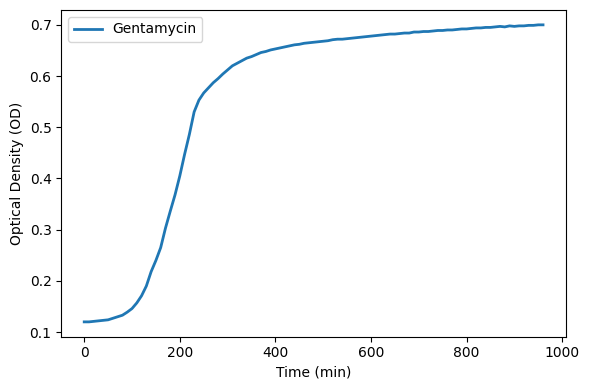

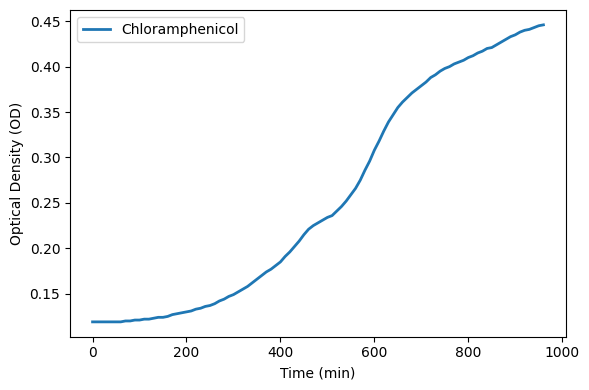

In [5]:
plot_growth_curve(time_min, Gentamycin, label='Gentamycin')
plot_growth_curve(time_min, Chloramphenicol, label='Chloramphenicol')

## Using function inputs

Notice what we did *not* do:

- We did not write a function that assumes `time_min` and `Gentamycin` exist somewhere above in the notebook.
- We passed the arrays we need directly as inputs.

This makes the function easier to reuse, and makes it much harder to accidentally depend on previously-defined objects.

## Printing vs returning

When you call a function, two different things can happen:

- `print(...)` shows text output for *you* (the human) to read.
- `return ...` gives a value back to the *rest of your code* so you can use it later.

**Printing does not create a value you can compute with**. It just displays text.

A key detail: if a function does not have a `return` statement, Python returns a special value called `None`.

> You can think of `None` as: “there is no useful value here.”

Let's write a few versions of the same thing (get the final OD value) and see how they behave.

In [6]:
def final_od(od):
    """Return the last value of an OD array."""
    return od[-1]


def print_final_od(od, label):
    """Print the final OD value (but do not return it)."""
    print(label, 'final OD:', od[-1])


def report_and_return_final_od(od, label):
    """Print the final OD value and return it."""
    value = od[-1]
    print(label, 'final OD:', value)
    return value

In [7]:
# Because final_od returns a number, we can store it in a variable
g_final = final_od(Gentamycin)
c_final = final_od(Chloramphenicol)

print('Gentamycin final OD:', g_final)
print('Chloramphenicol final OD:', c_final)

Gentamycin final OD: 0.7
Chloramphenicol final OD: 0.446


In [12]:
# This function prints, but does not return anything useful
output = print_final_od(Gentamycin, 'Gentamycin')
print('The return value of print_final_od is:', output,"\n")

# This version prints AND returns, so we can reuse the number
g_final2 = report_and_return_final_od(Gentamycin, 'Gentamycin')
print('g_final2 - c_final =', g_final2 - c_final)

Gentamycin final OD: 0.7
The return value of print_final_od is: None 

Gentamycin final OD: 0.7
g_final2 - c_final = 0.25399999999999995


### Exercise 1

Write a function that takes a single input number `n` and returns the **sum of all odd integers** less than or equal to `n`.

- First check whether `n` is positive. If `n` is not positive (0 or negative), return `-1`.
- If `n` is positive, compute the sum and return it.

Hint: One simple way to loop over odd integers is `for i in range(1, n+1, 2):` (start at 1, go up to `n`, step by 2).

After you write the function, test it on a few values (positive and negative) in a new code cell.

In [ ]:
# Your code here





## Variable scope (a practical view)

Variables created *inside* a function are **local** to that function.

This is usually good (it prevents collisions), but it also means that a function cannot magically change variables in your notebook unless you explicitly return something.

In [13]:
x = 10

def try_to_change_x():
    x = 5  # This x is local to the function
    print('Inside the function, x =', x)

try_to_change_x()
print('Outside the function, x =', x)

Inside the function, x = 5
Outside the function, x = 10


## Moving code into a `.py` file

If you find yourself reusing the same functions across notebooks, it is often convenient to put them into a Python file (a `.py` file).

We will create a small file called `mol518_utils.py` that contains a couple of simple helper functions.

We will create the file using standard Python file writing (the same idea as Lecture 5 when we wrote CSV files).

In [ ]:
utils_code = '''import numpy as np


def load_growth_curve_csv(path, delimiter=",", skiprows=1):
    """
    Load a growth curve CSV file with two columns: time and OD.

    Parameters
    ----------
    path : str or pathlib.Path
        Path to a CSV file.
    delimiter : str
        Column delimiter in the file.
    skiprows : int
        Number of header rows to skip.

    Returns
    -------
    time : numpy array
        Time values (first column).
    od : numpy array
        OD values (second column).
    """

    data = np.loadtxt(path, delimiter=delimiter, skiprows=skiprows)
    time = data[:, 0]
    od = data[:, 1]
    return time, od


def final_value(arr):
    """Return the last value of an array."""
    return arr[-1]
'''

with open('mol518_utils.py', 'w') as f:
    f.write(utils_code)

print('Wrote mol518_utils.py')

In [ ]:
import mol518_utils as utils

Now we can use the functions from `mol518_utils.py`.

We'll load one growth curve replicate file from Lecture 5 and plot it.

In [ ]:
rep1_path = Path('../Lecture_5/data/ecoli_drug_curves/Ampicillin/Ampicillin_rep1.csv')
time, od = utils.load_growth_curve_csv(rep1_path)

plt.figure(figsize=(6, 4))
plt.plot(time, od, lw=2, color='black')
plt.xlabel('Time (min)')
plt.ylabel('Optical Density (OD)')
plt.tight_layout()
plt.show()

print('Final OD:', utils.final_value(od))

**Note:** When you run the cell that *writes* `mol518_utils.py`, it creates a new file on disk. Only after that file exists can the next cell `import mol518_utils as utils` work.

If you edit `mol518_utils.py` and then re-run `import mol518_utils as utils`, you may not see your changes immediately. A simple workflow in Colab is to restart the runtime and re-run the notebook cells when you change a `.py` file.

## A simple testing habit

Before you trust a function on real data, test it on a tiny dataset where you know the answer.

For example, if an array is `[1, 2, 3]`, the final value should be `3`.

In [ ]:
toy = np.array([1, 2, 3])
print('final_value(toy) should be 3 ->', utils.final_value(toy))

### Exercise 1

In Lecture 2 we normalized an OD curve by dividing by its first value. Write a function called `normalize_by_first` that takes an array and returns a new array divided by its first entry.

Then test it on `toy = np.array([1, 2, 3])`. What should the result be?

In [ ]:
# Your code here




### Exercise 2

You now have a working pattern for building reusable code:

1. Write the function in the notebook
2. Test it on a tiny dataset
3. Move it into a `.py` file so you can reuse it

Take one repeated block from your own work (for example: load a file, compute the final OD, and plot the result), and turn it into a function. Then put that function into a `.py` file and import it.

In [ ]:
# Your code here


